# Comparison of mean- vs fluctuation-driven sequence continuity

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from aux import get_c_mean_p, get_c_spd
from disp import set_plot

In [2]:
data_mft = np.load('data/seq_speed/seqs_long_mft.npy', allow_pickle=True)[0]

D = data_mft['D']

c_mean_md_mft = data_mft['c_mean_md']
look_back_md_mft = data_mft['look_back_md']

c_mean_fd_mft = data_mft['c_mean_fd']
look_back_fd_mft = data_mft['look_back_fd']

data_md_full = np.load('data/seq_speed/seqs_long_full_md.npy', allow_pickle=True)[0]

c_mean_md_full = data_md_full['c_mean_md']
look_back_md_full = data_md_full['look_back_md']

data_fd_full = np.load('data/seq_speed/seqs_long_full_fd.npy', allow_pickle=True)[0]

c_mean_fd_full = data_fd_full['c_mean_fd']
look_back_fd_full = data_fd_full['look_back_fd']

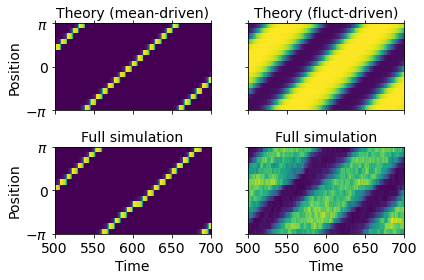

In [3]:
t_max = len(data_mft['ths_md'])
t = range(t_max)
extent = [0, t_max-1, -np.pi, np.pi]

fig, axs = plt.subplots(2, 2, figsize=(6, 4), tight_layout=True, sharex=True, sharey=True)
axs[0, 0].matshow(data_mft['ths_md'].T, origin='lower', extent=extent)
axs[1, 0].matshow(data_md_full['ths_md'].T, origin='lower', extent=extent)

axs[0, 1].matshow(data_mft['ths_fd'].T, origin='lower', extent=extent)
axs[1, 1].matshow(data_fd_full['ths_fd'].T, origin='lower', extent=extent)

for ax in axs.flat:
    ax.set_aspect('auto')
    
set_plot(axs[0, 0], title='Theory (mean-driven)')
set_plot(axs[0, 1], title='Theory (fluct-driven)')
    
for ax in axs[1, :]:
    ax.xaxis.tick_bottom()
    set_plot(ax, x_lim=(500, 700), x_label='Time', title='Full simulation')
    
for ax in axs[:, 0]:
    set_plot(ax, y_ticks=[-np.pi, 0, np.pi], y_tick_labels=[r'$-\pi$', 0, r'$\pi$'], y_label='Position')
    
for ax in axs.flat:
    set_plot(ax, font_size=14)
    
fig.savefig('figs/main/4_seq_xpls.svg')

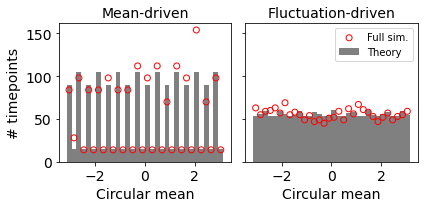

In [4]:
bins = np.linspace(-np.pi, np.pi, int(2*D)+1)
binc = .5*(bins[:-1] + bins[1:])

fig, axs = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True, sharey=True)

cts_md_full = np.histogram(c_mean_md_full[-look_back_md_full:], bins=bins)[0]
axs[0].scatter(binc, cts_md_full, facecolors='none', edgecolors='r', zorder=100)

axs[0].hist(c_mean_md_mft[-look_back_md_mft:], bins, color='gray')


axs[0].set_ylabel('# timepoints')
axs[0].set_title('Mean-driven')

cts_fd_full = np.histogram(c_mean_fd_full[-look_back_md_full:], bins=bins)[0]
axs[1].scatter(binc, cts_fd_full, facecolors='none', edgecolors='r', zorder=100)

axs[1].hist(c_mean_fd_mft[-look_back_fd_mft:], bins, color='gray')

axs[1].set_title('Fluctuation-driven')

for ax in axs:
    set_plot(ax, x_label='Circular mean', font_size=14)
    
axs[1].legend(['Full sim.', 'Theory'])
    
fig.savefig('figs/main/4_seq_md_fd_disc_cont.svg')